In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\ExcelR\simple linear4\delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

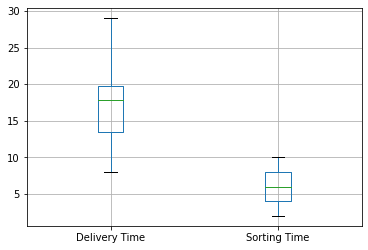

In [6]:
df.boxplot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


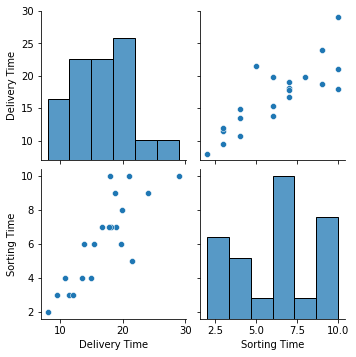

In [8]:
import seaborn as sns
sns.pairplot(data=df)

In [9]:
#there is positive assosiation between sorting time and delivery time

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# simple linear regression MODEL 1

In [11]:
df.rename(columns = {'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, inplace = True)

In [12]:
import numpy as np
import statsmodels.formula.api as smf

In [13]:
# Bulding model by ols method for prediction of delicery time.

In [14]:
model1=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        16:10:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred=model1.predict(df.iloc[:,1])  #model1.predict(df["Sorting_Time"])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
rmse=np.sqrt(np.mean((np.array(df['Delivery_Time'])-np.array(pred))**2))
rmse

2.7916503270617654

In [18]:
newdata=pd.Series([10,15,12,6,11,2,6,7])
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
model1.predict(data_pred)

0    23.072933
1    31.318032
2    26.370973
3    16.476853
4    24.721953
5     9.880774
6    16.476853
7    18.125873
dtype: float64

In [19]:
model2=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=df).fit()
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        16:10:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2=model2.predict(df.iloc[:,1])  #model1.predict(df["Sorting_Time"])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [22]:
rmse=np.sqrt(np.mean((np.array(df['Delivery_Time'])-np.array(pred2))**2))
rmse

2.733171476682066

In [23]:
#second exponential TRASFORMATION
model3=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=df).fit()
model3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [24]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 09 Dec 2021   Prob (F-statistic):           1.59e-06
Time:                           16:10:15   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model3.rsquared

0.7109478980584187

In [26]:
pred3=model3.predict(df.iloc[:,1])  #model1.predict(df["Sorting_Time"])
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [27]:
rmse=np.sqrt(np.mean((np.array(df['Delivery_Time'])-np.array(pred3))**2))
rmse

14.795516941016686

In [28]:
newdata=pd.Series([10,15,12,6,11,2,6,7])


In [29]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,10
1,15
2,12
3,6
4,11
5,2
6,6
7,7


In [30]:
model3.predict(data_pred)

0    3.176888
1    3.704646
2    3.387991
3    2.754681
4    3.282439
5    2.332475
6    2.754681
7    2.860233
dtype: float64

# model 3 is better than other models in this data set